# News Sentiment Analysis

## Step 1: Import important packages

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

## Step 2: Load the Dataset

In [2]:
df = pd.read_csv('crypto_news.csv')
df.columns

Index(['link', 'headline', 'description', 'html', 'year', 'author', 'source'], dtype='object')

In [3]:
features = ['link','headline','description','year']
df = df[features]

## Step 3: Create a function to get polarity

In [4]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['headline'].apply(getPolarity)
df.head(5)

,link,headline,description,year,Polarity
0,https://www.ccn.com/bitcoin-price-update-will-...,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Priced in USD on Mt. GoxAbove is Gox p...,2013,-0.155556
1,https://www.ccn.com/key-bitcoin-price-levels-w...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"The Bitcoin price up to 2013/12/14, with Fib l...",2013,0.000000
2,https://www.ccn.com/national-australia-bank-ci...,"National Australia Bank, Citing Highly Flawed ...",National Australia Bank looms over Melbourne’s...,2013,-0.500000
3,https://www.ccn.com/chinese-banking-ban-bitcoi...,Chinese Bitcoin Ban Driven by Chinese Banking...,Recent reports from China indicate there may b...,2013,0.000000
4,https://www.ccn.com/bitcoin-trade-update-opene...,Bitcoin Trade Update: Opened Position,"Opened 1st Bitcoin trade position, price curre...",2013,0.000000


## Step 4: Create a function to compute Positive, Negative and Neutral Sentiments

In [5]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else: return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.head(5)

,link,headline,description,year,Polarity,Sentiment
0,https://www.ccn.com/bitcoin-price-update-will-...,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Priced in USD on Mt. GoxAbove is Gox p...,2013,-0.155556,Negative
1,https://www.ccn.com/key-bitcoin-price-levels-w...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"The Bitcoin price up to 2013/12/14, with Fib l...",2013,0.000000,Neutral
2,https://www.ccn.com/national-australia-bank-ci...,"National Australia Bank, Citing Highly Flawed ...",National Australia Bank looms over Melbourne’s...,2013,-0.500000,Negative
3,https://www.ccn.com/chinese-banking-ban-bitcoi...,Chinese Bitcoin Ban Driven by Chinese Banking...,Recent reports from China indicate there may b...,2013,0.000000,Neutral
4,https://www.ccn.com/bitcoin-trade-update-opene...,Bitcoin Trade Update: Opened Position,"Opened 1st Bitcoin trade position, price curre...",2013,0.000000,Neutral


## Step 5: Plot a bar graph

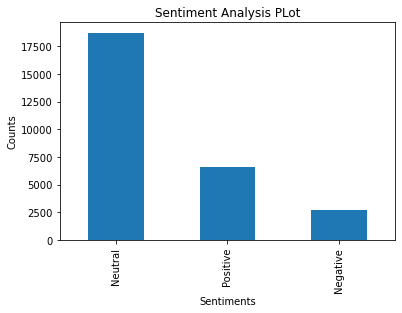

In [6]:
plt.title('Sentiment Analysis PLot')
df['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

## Step 6: Plot the Sum of the polarity for each year


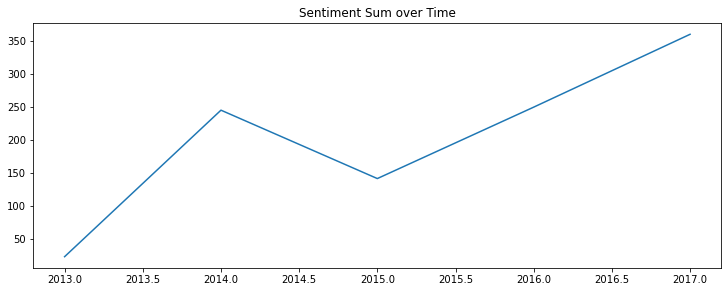

In [7]:
plt.figure(figsize = (12.33, 4.5))
plt.title('Sentiment Sum over Time')
polarity = df.groupby(['year']).sum()['Polarity']
plt.plot(polarity.index, polarity)

In [8]:
polarity

year
2013     22.947175
2014    245.015726
2015    141.357692
2016    249.616311
2017    360.032574
Name: Polarity, dtype: float64

In [9]:
polarity_count = df.groupby(['year']).count()['Polarity']
polarity_count

year
2013      699
2014     5353
2015     4713
2016     6725
2017    10579
Name: Polarity, dtype: int64

In [10]:
polarity_average = polarity / polarity_count
polarity_average

year
2013    0.032829
2014    0.045772
2015    0.029993
2016    0.037118
2017    0.034033
Name: Polarity, dtype: float64

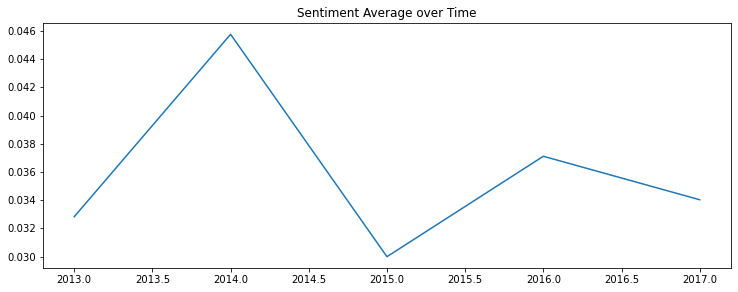

In [11]:
plt.figure(figsize = (12.33, 4.5))
plt.title('Sentiment Average over Time')
plt.plot(polarity_average.index, polarity_average)